In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# ----------------------------------------
# دالة تقسيم البيانات وحدها
# ----------------------------------------
def split_and_save(input_file="cleaned_real_estate.csv", test_size=0.30, val_size=0.50, random_state=42):
    # قراءة البيانات النظيفة
    df_clean = pd.read_csv(input_file)
    
    # فصل الميزات عن الهدف
    X = df_clean.drop(columns=['Y house price of unit area'])
    y = df_clean['Y house price of unit area']
    
    # تقسيم البيانات
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=True
    )
    
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=val_size, random_state=random_state, shuffle=True
    )
    
    # طباعة نتائج التقسيم
    print("=== Data Split Summary ===")
    print("Training set:   ", X_train.shape, y_train.shape)
    print("Validation set: ", X_val.shape,   y_val.shape)
    print("Test set:       ", X_test.shape,  y_test.shape)
    
    total = len(df_clean)
    print("\nPercentages:")
    print("Train:", round(len(X_train)/total*100, 2), "%")
    print("Val:  ", round(len(X_val)/total*100, 2), "%")
    print("Test: ", round(len(X_test)/total*100, 2), "%")
    
    # حفظ الملفات بعد التقسيم
    X_train.to_csv("X_train.csv", index=False)
    X_val.to_csv("X_val.csv", index=False)
    X_test.to_csv("X_test.csv", index=False)
    
    y_train.to_csv("y_train.csv", index=False)
    y_val.to_csv("y_val.csv", index=False)
    y_test.to_csv("y_test.csv", index=False)
    
    print("\n✔ تم حفظ الملفات بنجاح")

# ----------------------------------------
# استدعاء الدالة
# ----------------------------------------
split_and_save()


=== Data Split Summary ===
Training set:    (212, 7) (212,)
Validation set:  (45, 7) (45,)
Test set:        (46, 7) (46,)

Percentages:
Train: 69.97 %
Val:   14.85 %
Test:  15.18 %

✔ تم حفظ الملفات بنجاح


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# ----------------------------------------
# 1) تحميل الملفات الجاهزة
# ----------------------------------------
X_train = pd.read_csv("X_train.csv")
X_val   = pd.read_csv("X_val.csv")
X_test  = pd.read_csv("X_test.csv")



# ----------------------------------------
# 2) إنشاء StandardScaler
# ----------------------------------------
scaler = StandardScaler()

# ----------------------------------------
# 3) Scaling على X_train فقط (fit)
# ----------------------------------------
X_train_scaled = scaler.fit_transform(X_train)

# ----------------------------------------
# 4) Scaling على X_val و X_test (transform فقط)
# ----------------------------------------
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ----------------------------------------
# 5) إعادة التحويل إلى DataFrame مع نفس أسماء الأعمدة
# ----------------------------------------
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled   = pd.DataFrame(X_val_scaled,   columns=X_val.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X_test.columns)

# ----------------------------------------
# 6) حفظ الملفات بعد الـ Scaling
# ----------------------------------------
X_train_scaled.to_csv("X_train_scaled.csv", index=False)
X_val_scaled.to_csv("X_val_scaled.csv", index=False)
X_test_scaled.to_csv("X_test_scaled.csv", index=False)



print("✔ تم حفظ الملفات بنجاح!")
print("الملفات المحفوظة:")
print("- X_train_scaled.csv")
print("- X_val_scaled.csv")
print("- X_test_scaled.csv")


✔ تم حفظ الملفات بنجاح!
الملفات المحفوظة:
- X_train_scaled.csv
- X_val_scaled.csv
- X_test_scaled.csv


===== Correlation Matrix =====
                                              No  X1 transaction date  \
No                                      1.000000            -0.048658   
X1 transaction date                    -0.048658             1.000000   
X2 house age                           -0.032808             0.017549   
X3 distance to the nearest MRT station -0.013573             0.060880   
X4 number of convenience stores        -0.012699             0.009635   
X5 latitude                            -0.010110             0.035058   
X6 longitude                           -0.011059            -0.041082   
Y house price of unit area             -0.028587             0.087491   

                                        X2 house age  \
No                                         -0.032808   
X1 transaction date                         0.017549   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.025622   
X4 number of convenience stores

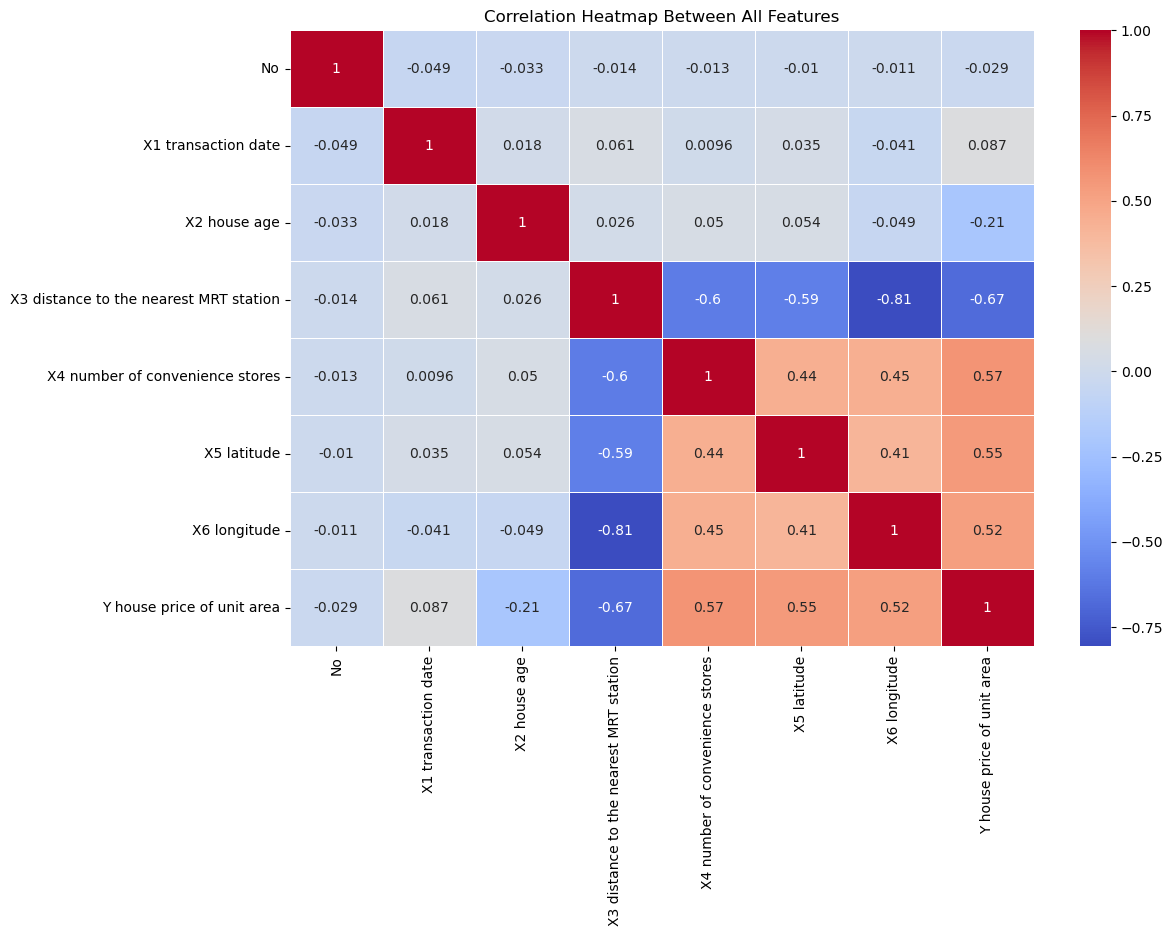


===== Correlation With Target =====
Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64


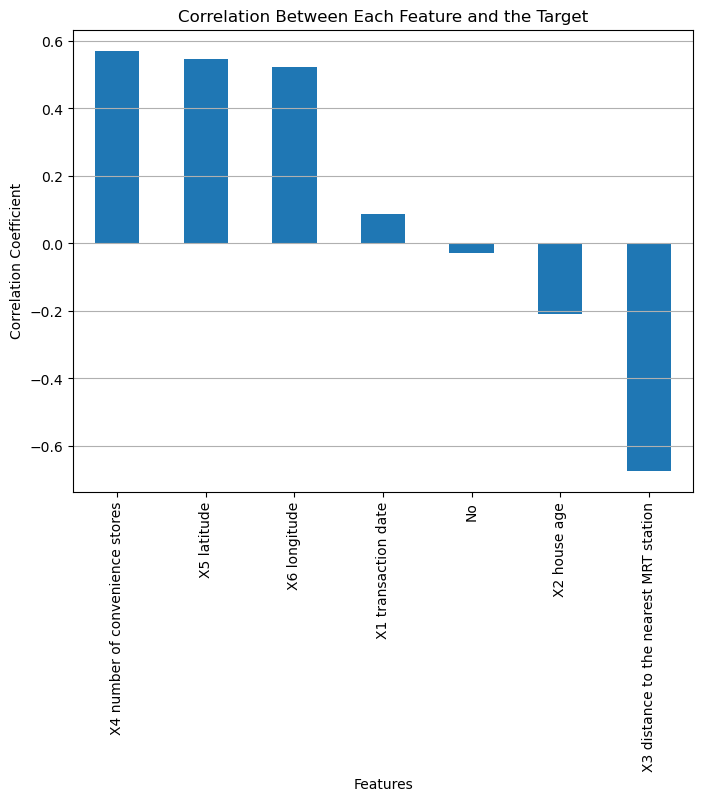

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
# 1) تحميل البيانات
# ============================
df = pd.read_csv("Real estate.csv")   # تأكد من اسم الملف

# ============================
# 2) حساب مصفوفة الارتباط
# ============================
corr_matrix = df.corr()

# ============================
# 3) عرض مصفوفة الارتباط
# ============================
print("===== Correlation Matrix =====")
print(corr_matrix)

# ============================
# 4) رسم Heatmap للمصفوفة
# ============================
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap Between All Features")
plt.show()

# ============================
# 5) استخراج الارتباط مع الهدف فقط
# ============================
target = 'Y house price of unit area'
corr_with_target = corr_matrix[target].sort_values(ascending=False)

print("\n===== Correlation With Target =====")
print(corr_with_target)

# ============================
# 6) رسم الارتباط بين الميزات والهدف
# ============================

plt.figure(figsize=(8, 6))
corr_with_target.drop(target).plot(kind='bar')
plt.title("Correlation Between Each Feature and the Target")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.grid(axis='y')
plt.show()



📌 Feature correlations with Target (sorted desc):
X5 latitude                               0.562593
X4 number of convenience stores           0.559517
X6 longitude                              0.530660
X2 house age                             -0.248554
X3 distance to the nearest MRT station   -0.662357
Name: Target, dtype: float64


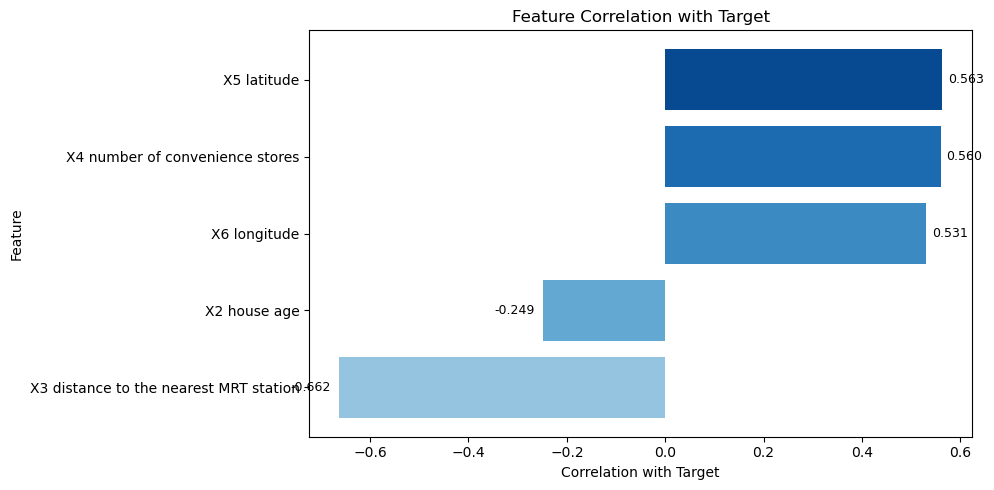

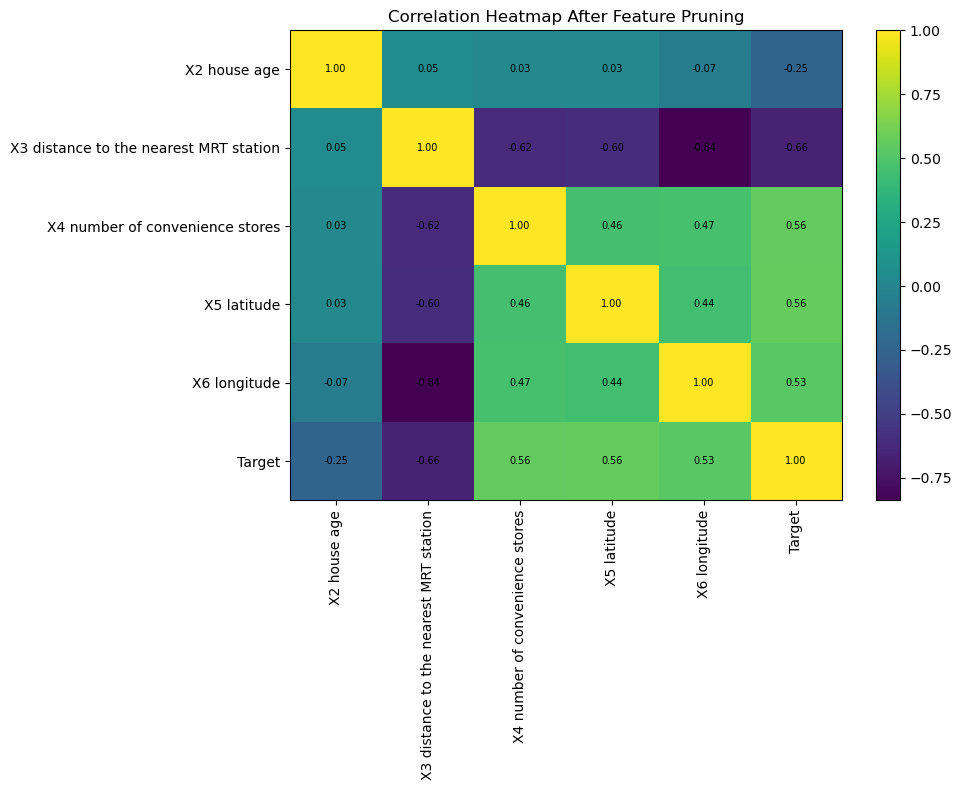


🔻 Dropped for WEAK correlation with target: ['No', 'X1 transaction date']
🔻 Dropped for HIGH inter-feature correlation: []

📁 Saved filtered CSV files:
 - train_filtered.csv
 - val_filtered.csv
 - test_filtered.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

def prune_features_by_correlation(df, target_series, weak_thresh=(-0.1, 0.1), high_corr_thresh=0.85):
    """
    df: DataFrame من الميزات (بدون target).
    target_series: Series الخاصة بالـ Target (طولها يجب أن يطابق عدد صفوف df).
    weak_thresh: حدود الارتباط الضعيف (lower, upper).
    high_corr_thresh: عتبة الترابط العالي بين الميزات لحذف أحدهما.
    """
    df = df.copy().reset_index(drop=True)
    target_series = target_series.reset_index(drop=True)
    target_name = target_series.name if target_series.name else "Target"
    df[target_name] = target_series

    # مصفوفة الارتباط
    corr = df.corr()

    # STEP 1: حذف الميزات ذات الارتباط الضعيف مع Target
    low, high = weak_thresh
    weak_features = corr[target_name][(corr[target_name] > low) & (corr[target_name] < high)].index.tolist()
    weak_features = [f for f in weak_features if f != target_name]

    if weak_features:
        df = df.drop(columns=weak_features)
        corr = df.corr()

    # STEP 2: حذف الميزات ذات الترابط العالي فيما بينها
    features = list(df.columns)
    if target_name in features:
        features.remove(target_name)

    to_drop = set()
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            f1, f2 = features[i], features[j]
            if abs(corr.loc[f1, f2]) >= high_corr_thresh:
                corr_f1 = abs(corr.loc[f1, target_name])
                corr_f2 = abs(corr.loc[f2, target_name])
                # احذف الأقل ارتباطاً بالـ target
                if corr_f1 < corr_f2:
                    to_drop.add(f1)
                else:
                    to_drop.add(f2)

    if to_drop:
        df = df.drop(columns=list(to_drop))

    # أخيراً، أعِد DataFrame دون عمود Target
    remaining_df = df.drop(columns=[target_name])
    return remaining_df, sorted(list(to_drop)), sorted(weak_features)


# ------------------------------
# MAIN
# ------------------------------
# تحقق من وجود الملفات
if not os.path.exists("train_scaled.csv"):
    print("خطأ: الملف train_scaled.csv غير موجود في المجلد الحالي.")
    sys.exit(1)
if not os.path.exists("Y_train.csv"):
    print("خطأ: الملف Y_train.csv غير موجود في المجلد الحالي.")
    sys.exit(1)

# قراءة البيانات
df = pd.read_csv("train_scaled.csv")
Y_train = pd.read_csv("Y_train.csv")

# إذا كان Y_train ملف بعمود واحد بدون اسم، نعطيه اسمًا
if Y_train.shape[1] == 1:
    Y_train = Y_train.iloc[:, 0]
else:
    # إذا فيه أكثر من عمود نحاول استخدام عمود اسمه "Target" أو العمود الأول
    if "Target" in Y_train.columns:
        Y_train = Y_train["Target"]
    else:
        Y_train = Y_train.iloc[:, 0]

Y_train = Y_train.squeeze()
Y_train.name = "Target"

# تحقق من تساوي الأطوال
if len(df) != len(Y_train):
    print(f"طول train ({len(df)}) لا يساوي طول Y ({len(Y_train)}). سأقوم بإعادة ضبط الفهارس ومحاذاتها.")
    df = df.reset_index(drop=True)
    Y_train = Y_train.reset_index(drop=True)
    if len(df) != len(Y_train):
        raise ValueError("بعد إعادة الضبط، لا يزال طول train <> طول Y. تحقق من ملفاتك.")

# تطبيق فلترة الميزات
filtered_df, dropped_corr, dropped_weak = prune_features_by_correlation(df, Y_train,
                                                                       weak_thresh=(-0.1, 0.1),
                                                                       high_corr_thresh=0.85)

# إذا لا توجد ميزات متبقية - نوقف التنفيذ بطريقة واضحة
if filtered_df.shape[1] == 0:
    raise RuntimeError("لا توجد ميزات بعد التصفية. عدل العتبات أو تحقق من البيانات.")

# مصفوفة الارتباط بعد التنقية (نضيف Target مرة أخرى لمحسوبة الارتباط)
corr_new = filtered_df.assign(Target=Y_train).corr()

# طباعة الارتباط مع Target (مرتب تنازلياً)
feature_target_corr = corr_new["Target"].drop("Target").sort_values(ascending=False)
print("\n==============================")
print("📌 Feature correlations with Target (sorted desc):")
print("==============================")
print(feature_target_corr)

# ------------------------------
# BAR PLOT (أفقي) مثل الصورة
# ------------------------------
# نرتب من الأقل للأعلى حتى يظهر الأكبر في الأعلى عند رسم barh
corr_values = feature_target_corr.sort_values(ascending=True)

plt.figure(figsize=(10, 5))

# نستخدم تدرج أزرق كما في المثال
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(corr_values)))

bars = plt.barh(corr_values.index, corr_values.values, color=colors)
plt.xlabel("Correlation with Target")
plt.ylabel("Feature")
plt.title("Feature Correlation with Target")

# اضافة قيمة عند نهاية كل شريط، مع مراعاة القيم السالبة
x_min = corr_values.min()
x_max = corr_values.max()
x_range = x_max - x_min if x_max != x_min else abs(x_max) + 0.01

for i, (feat, v) in enumerate(zip(corr_values.index, corr_values.values)):
    # offset ديناميكي حسب مدى القيم
    offset = x_range * 0.01
    text_x = v + offset if v >= 0 else v - offset - 0.005
    ha = 'left' if v >= 0 else 'right'
    plt.text(text_x, i, f"{v:.3f}", va='center', ha=ha, fontsize=9)

plt.tight_layout()
plt.show()

# ------------------------------
# HEATMAP (مع قيم داخل الخلايا)
# ------------------------------
plt.figure(figsize=(10, 8))
plt.imshow(corr_new, interpolation='nearest', aspect='auto')
plt.colorbar()

plt.xticks(np.arange(len(corr_new.columns)), corr_new.columns, rotation=90)
plt.yticks(np.arange(len(corr_new.index)), corr_new.index)

for i in range(len(corr_new.index)):
    for j in range(len(corr_new.columns)):
        value = corr_new.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', fontsize=7)

plt.title("Correlation Heatmap After Feature Pruning")
plt.tight_layout()
plt.show()

# ------------------------------
# طباعة الميزات المحذوفة
# ------------------------------
print("\n🔻 Dropped for WEAK correlation with target:", dropped_weak)
print("🔻 Dropped for HIGH inter-feature correlation:", dropped_corr)
# ==============================
# حفظ ملفات CSV جديدة بعد حذف الأعمدة
# ==============================

# 1. حفظ TRAIN الجديد
filtered_df.to_csv("train_filtered.csv", index=False)

# 2. حفظ VAL و TEST مع نفس الأعمدة (نطابق الأعمدة فقط)
# نقرأ الملفات الأصلية
val = pd.read_csv("val_scaled.csv")
test = pd.read_csv("test_scaled.csv")

# نحذف نفس الأعمدة التي حُذفت من التدريب
columns_to_keep = filtered_df.columns.tolist()

val_filtered = val[columns_to_keep]
test_filtered = test[columns_to_keep]

# حفظ الملفات
val_filtered.to_csv("val_filtered.csv", index=False)
test_filtered.to_csv("test_filtered.csv", index=False)

print("\n📁 Saved filtered CSV files:")
print(" - train_filtered.csv")
print(" - val_filtered.csv")
print(" - test_filtered.csv")



In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import cross_val_score
import warnings
from tabulate import tabulate
import textwrap
warnings.filterwarnings('ignore')

def display_model_results(model, X_train, y_train, X_val, y_val, X_test, y_test, 
                         y_train_pred, y_val_pred, y_test_pred, feature_importance):
    """
    Display comprehensive model results in a formatted way
    """
    print("\n" + "=" * 80)
    print("📊 LINEAR REGRESSION MODEL - COMPREHENSIVE RESULTS")
    print("=" * 80)
    
    # ==============================
    # 1. MODEL INFORMATION
    # ==============================
    print("\n🔧 MODEL INFORMATION")
    print("-" * 40)
    
    model_info = [
        ["Model Type", "Linear Regression"],
        ["Training Samples", f"{X_train.shape[0]:,}"],
        ["Validation Samples", f"{X_val.shape[0]:,}"],
        ["Test Samples", f"{X_test.shape[0]:,}"],
        ["Number of Features", f"{X_train.shape[1]}"],
        ["Intercept (bias)", f"{model.intercept_:.4f}"],
        ["Equation", f"y = {model.intercept_:.4f} + Σ(βᵢ * Xᵢ)"]
    ]
    print(tabulate(model_info, tablefmt="grid"))
    
    # ==============================
    # 2. PERFORMANCE METRICS TABLE
    # ==============================
    print("\n📈 PERFORMANCE METRICS")
    print("-" * 40)
    
    # Calculate all metrics
    metrics_data = []
    for (y_true, y_pred, set_name) in [(y_train, y_train_pred, "Training"),
                                       (y_val, y_val_pred, "Validation"),
                                       (y_test, y_test_pred, "Test")]:
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        
        # Calculate MAPE (Mean Absolute Percentage Error)
        mape = np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-8))) * 100
        
        metrics_data.append([
            set_name,
            f"{mse:.4f}",
            f"{rmse:.4f}",
            f"{mae:.4f}",
            f"{r2:.4f}",
            f"{mape:.2f}%"
        ])
    
    metrics_headers = ["Dataset", "MSE", "RMSE", "MAE", "R² Score", "MAPE"]
    print(tabulate(metrics_data, headers=metrics_headers, tablefmt="grid"))
    
    # ==============================
    # 3. CROSS-VALIDATION RESULTS
    # ==============================
    print("\n🔄 CROSS-VALIDATION (5-FOLD)")
    print("-" * 40)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    cv_data = []
    for i in range(5):
        cv_data.append([
            f"Fold {i+1}",
            f"{cv_scores[i]:.4f}",
            f"{-cv_mse_scores[i]:.4f}",
            f"{np.sqrt(-cv_mse_scores[i]):.4f}"
        ])
    
    cv_headers = ["Fold", "R² Score", "MSE", "RMSE"]
    print(tabulate(cv_data, headers=cv_headers, tablefmt="grid"))
    
    print(f"\n📊 Cross-Validation Summary:")
    print(f"   Mean R²:   {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    print(f"   Mean MSE:  {-cv_mse_scores.mean():.4f}")
    print(f"   Mean RMSE: {np.sqrt(-cv_mse_scores.mean()):.4f}")
    
    # ==============================
    # 4. FEATURE IMPORTANCE DETAILS
    # ==============================
    print("\n🔍 FEATURE COEFFICIENTS (Top 15)")
    print("-" * 40)
    
    # Get top 15 features by absolute coefficient
    top_features = feature_importance.head(15)
    
    feature_data = []
    for idx, row in top_features.iterrows():
        # Color code based on coefficient sign
        if row['Coefficient'] > 0:
            effect = "🟢 Positive"
        else:
            effect = "🔴 Negative"
        
        # Format feature name if too long
        feature_name = row['Feature']
        if len(feature_name) > 25:
            feature_name = feature_name[:22] + "..."
        
        feature_data.append([
            feature_name,
            f"{row['Coefficient']:.6f}",
            effect,
            f"{row['Abs_Coefficient']:.6f}"
        ])
    
    feature_headers = ["Feature", "Coefficient", "Effect", "|Coefficient|"]
    print(tabulate(feature_data, headers=feature_headers, tablefmt="grid"))
    
    # ==============================
    # 5. PREDICTION EXAMPLES
    # ==============================
    print("\n🎯 PREDICTION EXAMPLES (Test Set)")
    print("-" * 40)
    
    # Get first 5 test samples
    example_data = []
    for i in range(min(5, len(y_test))):
        actual = y_test.iloc[i] if hasattr(y_test, 'iloc') else y_test[i]
        predicted = y_test_pred[i]
        error = predicted - actual
        error_percent = (error / actual) * 100 if actual != 0 else float('inf')
        
        example_data.append([
            f"Sample {i+1}",
            f"{actual:.2f}",
            f"{predicted:.2f}",
            f"{error:+.2f}",
            f"{error_percent:+.1f}%"
        ])
    
    example_headers = ["Sample", "Actual", "Predicted", "Error", "Error %"]
    print(tabulate(example_data, headers=example_headers, tablefmt="grid"))
    
    # ==============================
    # 6. MODEL DIAGNOSTICS
    # ==============================
    print("\n⚙️ MODEL DIAGNOSTICS")
    print("-" * 40)
    
    # Check for overfitting
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    r2_diff = abs(train_r2 - test_r2)
    
    # Check residuals normality
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    
    # Calculate residual statistics
    residual_stats = [
        ["R² Difference (Train-Test)", f"{r2_diff:.4f}"],
        ["Overfitting Risk", "⚠️ HIGH" if r2_diff > 0.15 else "✅ LOW"],
        ["Mean Residual (Train)", f"{residuals_train.mean():.4f}"],
        ["Std Residual (Train)", f"{residuals_train.std():.4f}"],
        ["Mean Residual (Test)", f"{residuals_test.mean():.4f}"],
        ["Std Residual (Test)", f"{residuals_test.std():.4f}"]
    ]
    
    print(tabulate(residual_stats, tablefmt="grid"))
    
    # ==============================
    # 7. CONFIDENCE INTERVALS
    # ==============================
    print("\n📏 PREDICTION CONFIDENCE")
    print("-" * 40)
    
    # Calculate confidence intervals based on RMSE
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    std_test = np.std(y_test)
    
    confidence_data = [
        ["Test RMSE", f"{rmse_test:.4f}"],
        ["Test Std Deviation", f"{std_test:.4f}"],
        ["RMSE/Std Ratio", f"{rmse_test/std_test:.4f}"],
        ["68% Prediction Interval", f"±{rmse_test:.4f}"],
        ["95% Prediction Interval", f"±{rmse_test*2:.4f}"],
        ["99.7% Prediction Interval", f"±{rmse_test*3:.4f}"]
    ]
    
    print(tabulate(confidence_data, tablefmt="grid"))
    
    # ==============================
    # 8. BUSINESS INSIGHTS
    # ==============================
    print("\n💡 BUSINESS INSIGHTS")
    print("-" * 40)
    
    # Get top 3 positive and negative features
    pos_features = feature_importance[feature_importance['Coefficient'] > 0].head(3)
    neg_features = feature_importance[feature_importance['Coefficient'] < 0].head(3)
    
    insights = []
    
    if len(pos_features) > 0:
        insights.append("\n✅ TOP POSITIVE INFLUENCES (Increase Price):")
        for _, row in pos_features.iterrows():
            insights.append(f"   • {row['Feature']}: +{row['Coefficient']:.4f} per unit")
    
    if len(neg_features) > 0:
        insights.append("\n❌ TOP NEGATIVE INFLUENCES (Decrease Price):")
        for _, row in neg_features.iterrows():
            insights.append(f"   • {row['Feature']}: {row['Coefficient']:.4f} per unit")
    
    # Calculate average prediction
    avg_prediction = np.mean(y_test_pred)
    insights.append(f"\n💰 AVERAGE PREDICTED PRICE: {avg_prediction:.2f}")
    
    # Calculate price range
    price_min = np.min(y_test_pred)
    price_max = np.max(y_test_pred)
    price_range = price_max - price_min
    insights.append(f"📊 PRICE RANGE: {price_min:.2f} - {price_max:.2f} (Range: {price_range:.2f})")
    
    print("\n".join(insights))
    
    # ==============================
    # 9. RECOMMENDATIONS
    # ==============================
    print("\n🎯 RECOMMENDATIONS")
    print("-" * 40)
    
    recommendations = [
        "1. Focus on improving features with highest positive coefficients",
        "2. Address features with negative coefficients to minimize their impact",
        f"3. Model explains {train_r2*100:.1f}% of price variation in training data",
        f"4. Model explains {test_r2*100:.1f}% of price variation in test data",
        "5. For new predictions, expect ±{:.2f} accuracy".format(rmse_test)
    ]
    
    for rec in recommendations:
        print(f"   {rec}")

def train_linear_regression_model():
    """
    Train a linear regression model using the filtered features
    """
    print("=" * 80)
    print("🚀 LINEAR REGRESSION MODEL TRAINING - REAL ESTATE PRICE PREDICTION")
    print("=" * 80)
    
    # ==============================
    # 1. Load the filtered data
    # ==============================
    print("\n📥 Loading filtered datasets...")
    
    # Features
    X_train = pd.read_csv("train_filtered.csv")
    X_val = pd.read_csv("val_filtered.csv")
    X_test = pd.read_csv("test_filtered.csv")
    
    # Target values
    y_train = pd.read_csv("y_train.csv")
    y_val = pd.read_csv("y_val.csv")
    y_test = pd.read_csv("y_test.csv")
    
    # If y files have column names, extract the series
    if y_train.shape[1] == 1:
        y_train = y_train.iloc[:, 0]
    if y_val.shape[1] == 1:
        y_val = y_val.iloc[:, 0]
    if y_test.shape[1] == 1:
        y_test = y_test.iloc[:, 0]
    
    print(f"✓ Training set: {X_train.shape[0]:,} samples, {X_train.shape[1]} features")
    print(f"✓ Validation set: {X_val.shape[0]:,} samples")
    print(f"✓ Test set: {X_test.shape[0]:,} samples")
    
    # ==============================
    # 2. Train Linear Regression Model
    # ==============================
    print("\n🔧 Training Linear Regression model...")
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    print("✅ Model trained successfully!")
    
    # ==============================
    # 3. Make Predictions
    # ==============================
    print("\n📊 Making predictions...")
    
    # Predict on all sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # ==============================
    # 4. Feature Importance Analysis
    # ==============================
    print("\n🔍 Analyzing feature importance...")
    
    # Create a DataFrame of feature coefficients
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': model.coef_,
        'Abs_Coefficient': np.abs(model.coef_)
    })
    
    # Sort by absolute coefficient value
    feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)
    
    # ==============================
    # 5. Display Comprehensive Results
    # ==============================
    display_model_results(model, X_train, y_train, X_val, y_val, X_test, y_test,
                         y_train_pred, y_val_pred, y_test_pred, feature_importance)
    
    # ==============================
    # 6. Save the Model and Predictions
    # ==============================
    print("\n💾 Saving model and results...")
    
    # Save the trained model
    joblib.dump(model, 'linear_regression_model.pkl')
    print("✅ Model saved as 'linear_regression_model.pkl'")
    
    # Save predictions
    predictions_df = pd.DataFrame({
        'train_actual': y_train.values,
        'train_pred': y_train_pred,
        'train_error': y_train.values - y_train_pred,
        'val_actual': y_val.values,
        'val_pred': y_val_pred,
        'val_error': y_val.values - y_val_pred,
        'test_actual': y_test.values,
        'test_pred': y_test_pred,
        'test_error': y_test.values - y_test_pred
    })
    predictions_df.to_csv('model_predictions.csv', index=False)
    print("✅ Predictions saved as 'model_predictions.csv'")
    
    # Save feature importance
    feature_importance.to_csv('feature_importance.csv', index=False)
    print("✅ Feature importance saved as 'feature_importance.csv'")
    
    # ==============================
    # 7. Generate Visualization Report
    # ==============================
    print("\n🎨 Generating comprehensive visualization report...")
    generate_visualization_report(model, X_train, y_train, y_train_pred, 
                                 X_test, y_test, y_test_pred, feature_importance)
    
    print("\n" + "=" * 80)
    print("✅ MODEL TRAINING COMPLETE!")
    print("=" * 80)
    
    return model, feature_importance

def generate_visualization_report(model, X_train, y_train, y_train_pred, 
                                 X_test, y_test, y_test_pred, feature_importance):
    """
    Generate a comprehensive visualization report
    """
    fig = plt.figure(figsize=(20, 15))
    
    # ==============================
    # 1. Actual vs Predicted - Combined
    # ==============================
    ax1 = plt.subplot(3, 3, 1)
    ax1.scatter(y_train, y_train_pred, alpha=0.5, s=30, label='Train', color='blue')
    ax1.scatter(y_test, y_test_pred, alpha=0.5, s=30, label='Test', color='red')
    ax1.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
            [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
            'k--', lw=2, label='Perfect Prediction')
    ax1.set_xlabel('Actual Values')
    ax1.set_ylabel('Predicted Values')
    ax1.set_title('Actual vs Predicted (Train & Test)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # ==============================
    # 2. Residuals Distribution
    # ==============================
    ax2 = plt.subplot(3, 3, 2)
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    
    ax2.hist(residuals_train, bins=30, alpha=0.5, label='Train', color='blue', density=True)
    ax2.hist(residuals_test, bins=30, alpha=0.5, label='Test', color='red', density=True)
    ax2.axvline(x=0, color='k', linestyle='--', linewidth=2)
    ax2.set_xlabel('Residuals')
    ax2.set_ylabel('Density')
    ax2.set_title('Residuals Distribution')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # ==============================
    # 3. Feature Importance Bar Chart
    # ==============================
    ax3 = plt.subplot(3, 3, 3)
    top_10 = feature_importance.head(10)
    colors = ['green' if x > 0 else 'red' for x in top_10['Coefficient']]
    y_pos = np.arange(len(top_10))
    ax3.barh(y_pos, top_10['Coefficient'], color=colors)
    ax3.set_yticks(y_pos)
    ax3.set_yticklabels(top_10['Feature'])
    ax3.set_xlabel('Coefficient Value')
    ax3.set_title('Top 10 Feature Coefficients')
    ax3.axvline(x=0, color='k', linestyle='-', linewidth=1)
    ax3.grid(True, alpha=0.3, axis='x')
    
    # ==============================
    # 4. Prediction Error vs Actual
    # ==============================
    ax4 = plt.subplot(3, 3, 4)
    ax4.scatter(y_test, y_test - y_test_pred, alpha=0.5, color='purple')
    ax4.axhline(y=0, color='k', linestyle='--', linewidth=2)
    ax4.set_xlabel('Actual Values (Test)')
    ax4.set_ylabel('Prediction Error')
    ax4.set_title('Prediction Error vs Actual')
    ax4.grid(True, alpha=0.3)
    
    # ==============================
    # 5. Learning Curve (Train/Test Error)
    # ==============================
    ax5 = plt.subplot(3, 3, 5)
    
    # Calculate errors for different training set sizes
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_errors = []
    test_errors = []
    
    for size in train_sizes:
        n_samples = int(size * len(X_train))
        X_subset = X_train[:n_samples]
        y_subset = y_train[:n_samples]
        
        model_temp = LinearRegression()
        model_temp.fit(X_subset, y_subset)
        
        # Training error
        y_train_pred_temp = model_temp.predict(X_subset)
        train_error = mean_squared_error(y_subset, y_train_pred_temp)
        
        # Test error (on same test set)
        y_test_pred_temp = model_temp.predict(X_test)
        test_error = mean_squared_error(y_test, y_test_pred_temp)
        
        train_errors.append(train_error)
        test_errors.append(test_error)
    
    ax5.plot(train_sizes * 100, train_errors, 'o-', label='Training Error', linewidth=2)
    ax5.plot(train_sizes * 100, test_errors, 's-', label='Test Error', linewidth=2)
    ax5.set_xlabel('Training Set Size (%)')
    ax5.set_ylabel('Mean Squared Error')
    ax5.set_title('Learning Curve')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # ==============================
    # 6. QQ Plot for Residuals
    # ==============================
    ax6 = plt.subplot(3, 3, 6)
    from scipy import stats
    
    stats.probplot(residuals_test, dist="norm", plot=ax6)
    ax6.set_title('Q-Q Plot of Residuals (Test Set)')
    ax6.grid(True, alpha=0.3)
    
    # ==============================
    # 7. Performance Metrics Comparison
    # ==============================
    ax7 = plt.subplot(3, 3, 7)
    
    metrics = ['MSE', 'RMSE', 'MAE', 'R²']
    train_metrics_vals = [
        mean_squared_error(y_train, y_train_pred),
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        mean_absolute_error(y_train, y_train_pred),
        r2_score(y_train, y_train_pred)
    ]
    test_metrics_vals = [
        mean_squared_error(y_test, y_test_pred),
        np.sqrt(mean_squared_error(y_test, y_test_pred)),
        mean_absolute_error(y_test, y_test_pred),
        r2_score(y_test, y_test_pred)
    ]
    
    x = np.arange(len(metrics))
    width = 0.35
    
    ax7.bar(x - width/2, train_metrics_vals, width, label='Train', color='blue')
    ax7.bar(x + width/2, test_metrics_vals, width, label='Test', color='red')
    
    ax7.set_xlabel('Metric')
    ax7.set_ylabel('Value')
    ax7.set_title('Performance Metrics Comparison')
    ax7.set_xticks(x)
    ax7.set_xticklabels(metrics)
    ax7.legend()
    ax7.grid(True, alpha=0.3, axis='y')
    
    # ==============================
    # 8. Cumulative Error Distribution
    # ==============================
    ax8 = plt.subplot(3, 3, 8)
    
    # Sort errors
    test_errors_sorted = np.sort(np.abs(y_test - y_test_pred))
    cumulative = np.arange(1, len(test_errors_sorted) + 1) / len(test_errors_sorted)
    
    ax8.plot(test_errors_sorted, cumulative, linewidth=2)
    ax8.set_xlabel('Absolute Error')
    ax8.set_ylabel('Cumulative Proportion')
    ax8.set_title('Cumulative Error Distribution (Test)')
    ax8.grid(True, alpha=0.3)
    
    # Add percentile lines
    for p in [0.5, 0.75, 0.9]:
        error_at_p = np.percentile(test_errors_sorted, p * 100)
        ax8.axvline(x=error_at_p, color='r', linestyle='--', alpha=0.5)
        ax8.text(error_at_p, p, f' {p*100:.0f}%', verticalalignment='bottom')
    
    # ==============================
    # 9. Model Equation Visualization
    # ==============================
    ax9 = plt.subplot(3, 3, 9)
    
    # Create a simple representation of the model equation
    top_3_features = feature_importance.head(3)
    
    equation_parts = [f"y = {model.intercept_:.4f}"]
    for _, row in top_3_features.iterrows():
        sign = '+' if row['Coefficient'] >= 0 else ''
        equation_parts.append(f"{sign}{row['Coefficient']:.4f}*{row['Feature'][:15]}")
    
    equation_text = " + ".join(equation_parts) + " + ..."
    
    # Wrap long text
    wrapped_text = textwrap.fill(f"Model Equation (Top 3 Features):\n{equation_text}", 
                                 width=40)
    
    ax9.text(0.5, 0.5, wrapped_text, 
             horizontalalignment='center',
             verticalalignment='center',
             transform=ax9.transAxes,
             fontsize=10,
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.5))
    
    ax9.axis('off')
    ax9.set_title('Linear Model Equation')
    
    plt.tight_layout()
    plt.savefig('comprehensive_model_report.png', dpi=150, bbox_inches='tight')
    plt.close()
    
    print("✅ Comprehensive report saved as 'comprehensive_model_report.png'")

def interactive_prediction_demo():
    """
    Interactive demonstration of making predictions
    """
    print("\n" + "=" * 80)
    print("🎮 INTERACTIVE PREDICTION DEMO")
    print("=" * 80)
    
    try:
        # Load the trained model
        model = joblib.load('linear_regression_model.pkl')
        
        # Load test data for examples
        X_test = pd.read_csv("test_filtered.csv")
        y_test = pd.read_csv("y_test.csv")
        
        if y_test.shape[1] == 1:
            y_test = y_test.iloc[:, 0]
        
        print("\n📋 Showing prediction examples from test set:")
        print("-" * 40)
        
        # Show 3 random examples
        indices = np.random.choice(len(X_test), 3, replace=False)
        
        for i, idx in enumerate(indices):
            features = X_test.iloc[idx].values.reshape(1, -1)
            actual = y_test.iloc[idx] if hasattr(y_test, 'iloc') else y_test[idx]
            predicted = model.predict(features)[0]
            
            print(f"\nExample {i+1}:")
            print(f"  Actual value:    {actual:.2f}")
            print(f"  Predicted value: {predicted:.2f}")
            print(f"  Error:           {predicted - actual:+.2f}")
            print(f"  Error %:         {(predicted - actual)/actual*100:+.1f}%")
        
        print("\n💡 You can make your own predictions using:")
        print("   model = joblib.load('linear_regression_model.pkl')")
        print("   prediction = model.predict(your_features)")
        
    except Exception as e:
        print(f"⚠️  Could not load model for demo: {e}")

# ==============================
# Main execution
# ==============================
if __name__ == "__main__":
    print("🚀 Starting Linear Regression Model Training...")
    print("=" * 80)
    
    try:
        # Train the model
        model, feature_importance = train_linear_regression_model()
        
        # Show interactive demo
        interactive_prediction_demo()
        
        print("\n" + "=" * 80)
        print("🎉 ALL TASKS COMPLETED SUCCESSFULLY!")
        print("=" * 80)
        print("\n📁 Generated Files:")
        print("   1. linear_regression_model.pkl - Trained model")
        print("   2. model_predictions.csv - All predictions")
        print("   3. feature_importance.csv - Feature coefficients")
        print("   4. comprehensive_model_report.png - Visual report")
        
    except FileNotFoundError as e:
        print(f"\n❌ ERROR: File not found - {e}")
        print("\n📋 Required files (run previous steps first):")
        print("   - train_filtered.csv")
        print("   - val_filtered.csv")
        print("   - test_filtered.csv")
        print("   - y_train.csv")
        print("   - y_val.csv")
        print("   - y_test.csv")
        
    except Exception as e:
        print(f"\n❌ ERROR: {e}")
        print("\n🔧 Troubleshooting:")
        print("   1. Check that all required CSV files exist")
        print("   2. Verify file paths are correct")
        print("   3. Ensure data is properly formatted")

🚀 Starting Linear Regression Model Training...
🚀 LINEAR REGRESSION MODEL TRAINING - REAL ESTATE PRICE PREDICTION

📥 Loading filtered datasets...
✓ Training set: 289 samples, 5 features
✓ Validation set: 63 samples
✓ Test set: 62 samples

🔧 Training Linear Regression model...
✅ Model trained successfully!

📊 Making predictions...

🔍 Analyzing feature importance...

📊 LINEAR REGRESSION MODEL - COMPREHENSIVE RESULTS

🔧 MODEL INFORMATION
----------------------------------------
+--------------------+--------------------------+
| Model Type         | Linear Regression        |
+--------------------+--------------------------+
| Training Samples   | 289                      |
+--------------------+--------------------------+
| Validation Samples | 63                       |
+--------------------+--------------------------+
| Test Samples       | 62                       |
+--------------------+--------------------------+
| Number of Features | 5                        |
+--------------------